# <span style="color:deeppink">Supervised Learning - Linear Regression</span>

# Review from Part 1

Remember that to achieve the inference goals of Machine Learning, there are a series of steps we usually take. This is the **Data Science Pipeline**. Note that in practice there will always be situations in which the pipeline looks a bit different, and instead of flowing in one direction, often we encounter iterations. The one presented here serves as a basis for the general principle of inference in Machine Learning.

## <span style="color:rebeccapurple">ML workflow steps:</span>

1. State the problem
2. Gather the data
3. Split train-test sets
4. Pre-process the data
5. Establish a baseline
6. Choose a model
7. Train the model
8. Optimize the model
9. Validate the model
10. Predict unknown data points using the model
11. Interpret and evaluate the model

## IMPORTANT
For each lesson, we will walk you the steps in the pipeline as we aim to fulfill a particular task. Hence the workshop series is not divide according to the list above, isntead the list will be the guiding narrative for each session.

Before we review, let's import the necessary modules and set some parameters for pretty figures:

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import sklearn

In [2]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

Now let's do a quick review.

## <span style="color:rebeccapurple">1. State the problem</span></h1>

(-0.5, 1835.5, 943.5, -0.5)

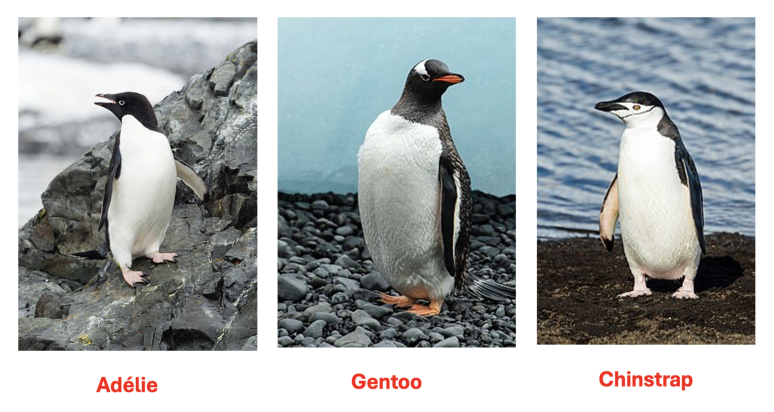

In [3]:
peng_img = mpimg.imread("images/penguins.png")
plt.imshow(peng_img)
plt.axis("off")

Here's a toy scenario: There is a reported shortage of food in the area, and we want to know if this will be consequential for the penguin populations. For this, we conclude we can calculate a penguin's consumption rate through its body mass. However, weighing the penguins is difficult. On the other hand, visual characteristics like fipper lenght, bill dimension, and sex, are easy to obtain. Our goal is to estimate body mass by using these characteristics.

We have obtained complete data (including body mass) of a sample of penguins, so we can learn from that the relationship visual features --> body mass. Using this, it will be easy to estimate the body mass for any future observation.

Here is a summary:<br>
**Task:** Predict the body mass of penguins through visual features.

**Input:** Table of penguins features.

**Output:** A value for body mass.

## <span style="color:rebeccapurple">2. Gather and inspect the data</span></h1>

**Data:** Size measurements for 344 adult foraging Adélie, Chinstrap, and Gentoo penguins observed on islands in the Palmer Archipelago near Palmer Station, Antarctica.

The data is in the file <penguins.csv>. Let's load it up and preview the exact measurements we took:

In [4]:
# Let's look at the data
df = pd.read_csv('data/penguins.csv')

<h4><span style="color:blue">Google Colab users only -- un-comment the code lines below and run them to download the dataset and read it</span></h4>

In [ ]:
# !wget https://raw.githubusercontent.com/nuitrcs/scikit-learn-workshop/main/data/penguins.csv
# df = pd.read_csv('penguins.csv')

In [ ]:
df.head()

In [ ]:
df.shape

Remember we are interested in body mass, let's look at the distribution among our observations:

In [ ]:
plt.figure(figsize=(4, 2))
sns.histplot(df['body_mass_g'], bins=20)
plt.title('Distribution of observed penguin body mass (g)')
plt.show()

In [ ]:
df.groupby("sex").mean("body_mass_g")

<span style="color:#DC537D"><font size="+1">What is the input data for prediction?</font></span>

In [ ]:
# select the input data
X = 
X.shape

<span style="color:#DC537D"><font size="+1">What is the target to be predicted?</font></span>

In [ ]:
# select the target column
y = 
y.shape

## <span style="color:rebeccapurple">3. Split the data into train and test</span></h1>
Remember you want to separate the train and test sets very early on, before pre-processing.

<span style="color:#DC537D"><font size="+1">Write code to split the dataset 80-20 train vs test</font></span>

In [ ]:
# import the required function
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset


In [ ]:
# look at the dimensions of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## <span style="color:rebeccapurple">4. Pre-process the training data</span>

<span style="color:#DC537D"><font size="+1">What kind of pre-processing does our dataset need?</font></span>

In [88]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
# list the numerical features
numeric_cols = 

In [ ]:
# list the categorical features
categorical_cols = 

In [ ]:
# check the shapes
X_train[numeric_cols].shape, X_train[categorical_cols].shape

<span style="color:#DC537D"><font size="+1">Standardize the numeric input features</font></span>

In [ ]:
# import scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# create instance
scaler = 

In [ ]:
# fit to the numerical columns of training X
scaler.fit(...)

In [ ]:
# transform numerical columns of both training X and testing X
numeric_X_train = 
numeric_X_test = 

In [ ]:
# check the shapes of the transformed numeric data
numeric_X_train.shape, numeric_X_test.shape

<span style="color:#DC537D"><font size="+1">One Hot Encode categorical input features</font></span>

In [13]:
# import encoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# create instance
ohe = 

In [ ]:
# fit encoder to the categorical columns of training X
ohe.fit(...)

In [ ]:
# transform categorical columns of both train X and test X with fitted encoder
ohe_X_train = 
ohe_X_test = 

In [ ]:
# convert to array
ohe_X_train = 
ohe_X_test = 

In [ ]:
# check the shapes of the transformed categorical data
ohe_X_train.shape, ohe_X_test.shape

<span style="color:#DC537D"><font size="+1">Stack the processed columns together</font></span>

In [ ]:
# ---------------- stack the processed columns together---------------
processed_X_train = np.hstack(...)
processed_X_test = np.hstack(...)

processed_X_train.shape, processed_X_test.shape

## <span style="color:rebeccapurple">5. Establish a baseline</span></h1>

The simplest prediction you could make would be an "average diagnosis":

In [22]:
df["body_mass_g"].mean()

4207.057057057057

The error on this prediction can be calculated too. Suppose we decide to calculate the mean squared error (MSE)
$$MSE = \overline{(Observed - Expected)^2}$$

In [23]:
error = df["body_mass_g"] - df["body_mass_g"].mean()
squared_error = error**2
mean_squared_error = np.mean(squared_error)
mean_squared_error

646425.4231709186

The objective of model training or model optimization is to reduce the training error as much as possible, without over-fitting the model.

Note - Ideally you never see the test set, so the "average prediction" would be calculated over the train set only.

<span style="color:#DC537D"><font size="+1">Provide a baseline target prediction and mean squared error using the training set</font></span><br>
Hint: use the training y column to calculate an error

In [ ]:
error = 
np.mean(error**2) # mean squared error

## <span style="color:rebeccapurple">6. Choose a model</span></h1>

<span style="color:#DC537D"><font size="+1">Is this a supervised or unsupervised learning task?</font></span>

<span style="color:#DC537D"><font size="+1">Is this a classification or regression task?</font></span>

<span style="color:#DC537D"><font size="+1">Are we predicting discrete or continuous values?</font></span>

## <span style="color:rebeccapurple">7. Train the model</span></h1>

<span style="color:#DC537D"><font size="+1">Use sklearn to train a linear regression model</font></span>

In [14]:
# import the model class 
from sklearn.linear_model import LinearRegression

In [ ]:
# create an instance of the model object
model = 

In [ ]:
# fit the model to the processed training data


In [ ]:
# get the intercept and model coefficients


In [ ]:
# get the model one-hot encoded categories


In [ ]:
# get the coefficients inside a nice dataframe
feature_names = numeric_cols + list(ohe.categories_[0]) + list(ohe.categories_[1]) + list(ohe.categories_[2])+ list(ohe.categories_[3])

coefs = pd.DataFrame(data= model.coef_ ,
                     columns= ["Coefficients"], 
                     index= feature_names )

coefs

<span style="color:#DC537D"><font size="+1">Which features look most relevant?</font></span>

In [ ]:
# plot the model coefficients
coefs.plot.barh(figsize=(10, 4))
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

## <span style="color:rebeccapurple">10. Predict values for the test set</span></h1>

<span style="color:#DC537D"><font size="+1">Generate predictions from your trained model</font></span>

In [ ]:
# generate predictions from your trained model
y_predicted_train = 
y_predicted_test = 

y_predicted_train.shape, y_predicted_test.shape

In [ ]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axes[0].scatter(y_train, y_predicted_train, s=2)
axes[0].set_title("Train data")
axes[1].scatter(y_test, y_predicted_test, s=2)
axes[1].set_title("Test data")

for ax in axes:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    ax.set(xlabel="Observed y", ylabel="Predicted y")

## <span style="color:rebeccapurple">11. Evaluate the model</span>

<span style="color:#DC537D"><font size="+1">What is the MSE?</font></span>

In [ ]:
# import metric function
from sklearn.metrics import mean_squared_error

In [ ]:
# calculate metric for test


In [ ]:
# calculate metric for train


<span style="color:#DC537D"><font size="+1">What is the $R^2$?</font></span>

In [15]:
# import metric function
from sklearn.metrics import r2_score

In [ ]:
# calculate metric for test


In [ ]:
# calculate metric for train


# <span style="color:rebeccapurple">Bonus Questions</span>
Feel free to code out variations of the ML workflow to answer these questions

<span style="color:#DC537D"><font size="+1">Does changing the train-test split ratio improve the model?</font></span>
<br>Hint: does the fraction of the split matter, or does the sample size?

<span style="color:#DC537D"><font size="+1">Do you always get the same result when you randomly split the train and test sets multiple times?</font></span>
<br>Hint: think about the variance in the model

<span style="color:#DC537D"><font size="+1">Are the features and target variables normally distributed?</font></span>
<br>Hint: think about transforming individual features _before_ pre-processing to make it more normal-like

<span style="color:#DC537D"><font size="+1">Does scaling really matter?</font></span>
<br>Hint: don't pre-process the numerical columns before modeling and compare the model coefficients with and without pre-processing. OR - multiply a numeric column by 1000, and then fit the model again without standardization, to see if the numeric feature you selected becomes more or less important!